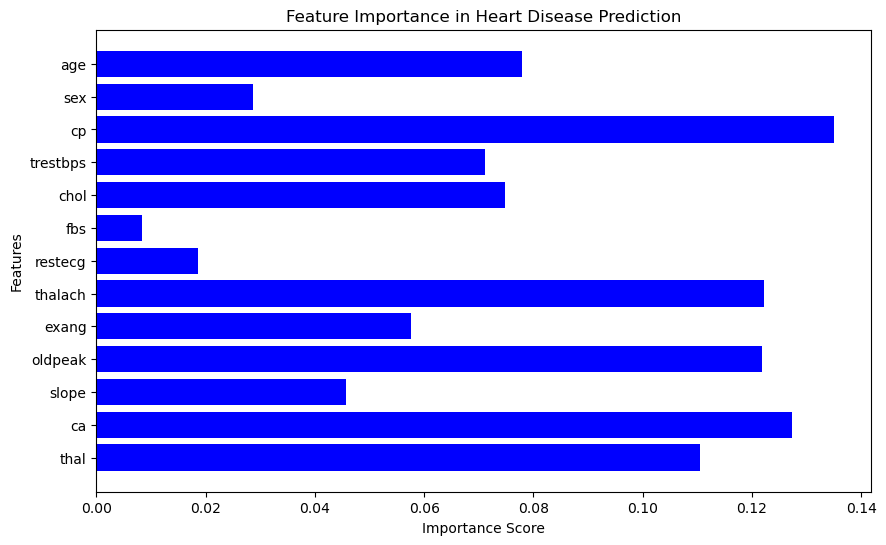


 Random Forest Accuracy: 0.9854

 The most important feature is: cp


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

df = pd.read_csv("D:\\heart\\heart.csv") 

label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

df.fillna(df.mean(), inplace=True)
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
feature_importances = rf_model.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(X.columns, feature_importances, color='blue')
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Heart Disease Prediction")
plt.gca().invert_yaxis()
plt.show()
print(f"\n Random Forest Accuracy: {accuracy:.4f}")
most_important_feature = X.columns[np.argmax(feature_importances)]
print(f"\n The most important feature is: {most_important_feature}")
